In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as pc
import itertools
import pandas as pd
import copy

from sklearn.externals import joblib

from utilities_hw2 import plot_results

# Travelling Salesman

In [3]:
iters = 5 # number of iterations for each setting in grid search

results = {}    

np.random.seed(13)

n_locations = [5, 10, 15, 20, 25, 30, 40, 50]
coord_lists = {n_location: np.random.randint(0, 10, size=(n_location, 2)).tolist() for n_location in n_locations}
# print(coord_lists)
problem = mlrose.TSPOpt

algorithms = {
    'MIMIC': {
        'algorithm': mlrose.mimic,
        'param_grid_algorithm': {'return_statistics': True, 'pop_size': ['15*problem_length'], 'keep_pct': [0.2], 'max_attempts': [50], 'max_iters': 1000},
    },
    'Hill Climbing': {
        'algorithm': mlrose.hill_climb,
        'param_grid_algorithm': {'return_statistics': True, 'restarts': 5},
    },
#     'Hill Climbing (sample)': {
#         'algorithm': mlrose.random_hill_climb,
#         'param_grid_algorithm': {'return_statistics': True, 'restarts': 5, 'max_attempts': 20},
#     },
    'Simulated Annealing': {
        'algorithm': mlrose.simulated_annealing,
        'param_grid_algorithm': {'return_statistics': True, 'max_attempts': 500, 'max_iters': 100000},
    },
    'Genetic Algorithm': {
        'algorithm': mlrose.genetic_alg,
        'param_grid_algorithm': {'return_statistics': True, 'elite': [0.5], 'pop_size': ['10*problem_length'], 'mutation_prob': 0.1, 'max_attempts': 50},
    },
}

# for k, d in algorithms.items():
#     d['problem'] = problem
#     d['param_grid_problem'] = param_grid_problem

for algo_name, settings in algorithms.items():
    results[algo_name] = []
    for n_location in n_locations:
        fitness_fn = mlrose.TravellingSales(coords=coord_lists[n_location])

        param_grid_problem = {'fitness_fn': fitness_fn,
                              'maximize': False,
                              'length': n_location, 
                             }

        thisSettings = copy.deepcopy(settings.copy())
        thisSettings['problem'] = problem
        thisSettings['param_grid_problem'] = param_grid_problem
    
        print(f"Looping for {algo_name}, n_location={n_location}")
        gs = mlrose.GridSearch(algorithm=thisSettings['algorithm'], param_grid_algorithm=thisSettings['param_grid_algorithm'], 
                               problem=thisSettings['problem'], param_grid_problem=thisSettings['param_grid_problem'], iters=iters)
        gs.evaluate()
        this_df = pd.DataFrame(gs.results)
        results[algo_name].extend(gs.results)

Looping for MIMIC, n_location=5
Running case 1/1: iteration 0
MIMIC finished after using 50/50 attempts, 51/1000, iters
Running case 1/1: iteration 1
MIMIC finished after using 50/50 attempts, 51/1000, iters
Running case 1/1: iteration 2
MIMIC finished after using 50/50 attempts, 50/1000, iters
Running case 1/1: iteration 3
MIMIC finished after using 50/50 attempts, 51/1000, iters
Running case 1/1: iteration 4
MIMIC finished after using 50/50 attempts, 51/1000, iters
Looping for MIMIC, n_location=10
Running case 1/1: iteration 0
MIMIC finished after using 50/50 attempts, 52/1000, iters
Running case 1/1: iteration 1
MIMIC finished after using 50/50 attempts, 54/1000, iters
Running case 1/1: iteration 2
MIMIC finished after using 50/50 attempts, 53/1000, iters
Running case 1/1: iteration 3
MIMIC finished after using 50/50 attempts, 52/1000, iters
Running case 1/1: iteration 4
MIMIC finished after using 50/50 attempts, 51/1000, iters
Looping for MIMIC, n_location=15
Running case 1/1: iter

Search ended with attempts>max_attempts (500>500).  Iters=2833
Running case 1/1: iteration 4
Search ended with attempts>max_attempts (500>500).  Iters=1904
Looping for Simulated Annealing, n_location=40
Running case 1/1: iteration 0
Search ended with attempts>max_attempts (500>500).  Iters=2520
Running case 1/1: iteration 1
Search ended with attempts>max_attempts (500>500).  Iters=2718
Running case 1/1: iteration 2
Search ended with attempts>max_attempts (500>500).  Iters=2304
Running case 1/1: iteration 3
Search ended with attempts>max_attempts (500>500).  Iters=4208
Running case 1/1: iteration 4
Search ended with attempts>max_attempts (500>500).  Iters=3565
Looping for Simulated Annealing, n_location=50
Running case 1/1: iteration 0
Search ended with attempts>max_attempts (500>500).  Iters=3090
Running case 1/1: iteration 1
Search ended with attempts>max_attempts (500>500).  Iters=2404
Running case 1/1: iteration 2
Search ended with attempts>max_attempts (500>500).  Iters=3210
Runnin

In [7]:
fname = 'tsp_results.pkl'
joblib.dump(results, fname)
# results = joblib.load(fname)

['tsp_results.pkl']

In [4]:
results_df = {k: pd.DataFrame(r) for k, r in results.items()}
# for k, df in results_df.items():
#     print(df)

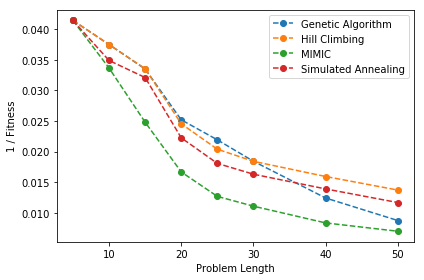

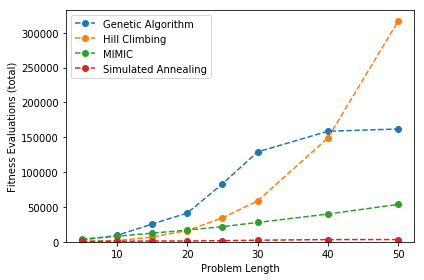

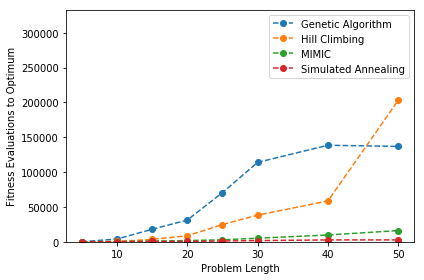

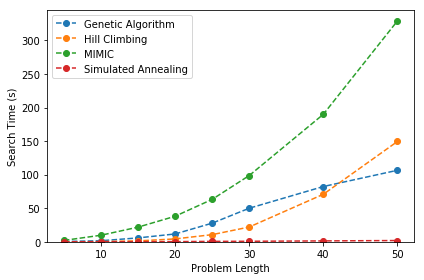

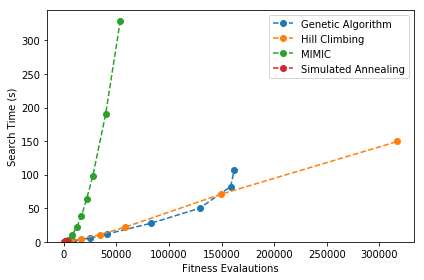

In [13]:
plot_results(results_df, savefig='tsp', invert_fitness=True)